# Deep Learning for MNIST Handwritten Digit Classification

Pada notebook ini, Kita akan mencoba membuat model Deep Learning untuk klasifikasi. Datasets yang digunakan adalah dataset MNIST berupa digit angka.

## **Dengan Keras**

In [ ]:
# import paket-paket
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import paket untuk deep learning
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.optimizers import Adam, RMSprop

### Import MNIST Datasets

Pada datasets MNIST, terdapat label angka 0 sampai 9. Kemudian memiliki 60.000 gambar sebagai data latih dan 10.000 gambar sebagai data uji. Datasets ini sudah tersedia secara built-in pada library Keras.

In [ ]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# hitung label unik pada data latih
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# hitung label unik pada data uji
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


### Visualisasi Data

Sebelum membuat model, mari Kita lihat sama-sama visualisasi data dari digit angka.

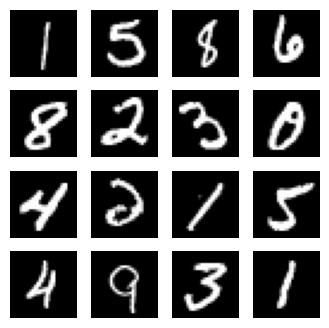

In [ ]:
# cek 16 data latih secara acak
indexes = np.random.randint(0, x_train.shape[0], size=16)
images = x_train[indexes]
labels = y_train[indexes]

# buat plot visualisasinya
plt.figure(figsize=(4,4))
for i in range(len(indexes)):
    plt.subplot(4, 4, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

### Prapemrosesan Data

Sebelum membuat model, ada beberapa langkah yang perlu Kita lakukan, yakni prapemrosesan data!

In [ ]:
# simpan label unik
num_labels = len(np.unique(y_train))

In [ ]:
# konversi vektor dengan teknik one-hot
y_train_oneH = to_categorical(y_train)
y_test_oneH = to_categorical(y_test)

In [ ]:
# cek dimensi gambar
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
# lihat dimensi gambar mula-mula
print('Dimensi data latih mula-mula:', x_train.shape)

Dimensi data latih mula-mula: (60000, 28, 28)


In [ ]:
# ubah dimensi gambar dan lakukan normalisasi
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
# lihat dimensi gambar terkini
print('Dimensi data latih terkini:', x_train.shape)

Dimensi data latih terkini: (60000, 784)


### Desain Model

Sekarang mari Kita membuat desain model Deep Learning yang akan digunakan!

In [ ]:
# atur beberapa parameter
batch_size = 8192
hidden_units = 256

In [ ]:
# buat model sederhana
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
# lihat ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


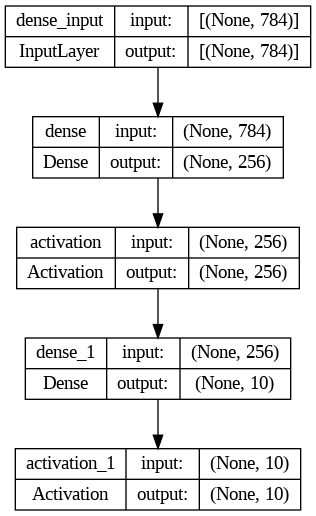

In [ ]:
# tampilkan ringkasan model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

### Pengaturan Hyperparameter

Selanjutnya, mari Kita lakukan pengaturan hyperparameter, seperti loss dan optimizer!

In [ ]:
# atur parameter loss, optimizer, dan metrik yang digunakan
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Latih Model

Setelah semua konfigurasi telah ditentukan, sekarang saatnya untuk melakukan pelatihan model! Let's go!

In [ ]:
# lakukan pelatihan model
model.fit(x_train,
          y_train_oneH,
          epochs=5,
          batch_size=batch_size)

Epoch 1/5
8/8 [==============================] - 5s 285ms/step - loss: 1.8267 - accuracy: 0.4959
Epoch 2/5
8/8 [==============================] - 2s 286ms/step - loss: 0.9068 - accuracy: 0.7972
Epoch 3/5
8/8 [==============================] - 3s 308ms/step - loss: 0.5635 - accuracy: 0.8491
Epoch 4/5
8/8 [==============================] - 3s 304ms/step - loss: 0.4332 - accuracy: 0.8804
Epoch 5/5
8/8 [==============================] - 4s 480ms/step - loss: 0.3706 - accuracy: 0.8960


In [ ]:
# lakukan evaluasi model
loss, acc = model.evaluate(x_test, y_test_oneH, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

2/2 [==============================] - 1s 63ms/step - loss: 0.3347 - accuracy: 0.9105

Test accuracy: 91.0%


### Evaluasi Model

Selanjutnya mari sama-sama lakukan prediksi dan cek akurasi dari model yang terbentuk! Untuk melakukannya, Kita bisa menggunakan library SKLearn.

In [ ]:
# import library untuk metrik
from sklearn.metrics import (classification_report, accuracy_score,
                             f1_score, recall_score, precision_score,
                             confusion_matrix, ConfusionMatrixDisplay)

In [ ]:
# lakukan prediksi
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 7ms/step


In [ ]:
# buat fungsi untuk mendecode hasil prediksi
def decodePred(pred):
  allPred = []
  for i in range(len(pred)):
    maxV = max(list(pred[i]))
    maxI = list(pred[i]).index(maxV)
    allPred.append(maxI)
  return np.array(allPred)

In [ ]:
# jalankan fungsi dan simpan ke variabel baru
y_pred_decode = decodePred(y_pred)
y_pred_decode

array([7, 2, 1, ..., 4, 5, 6])

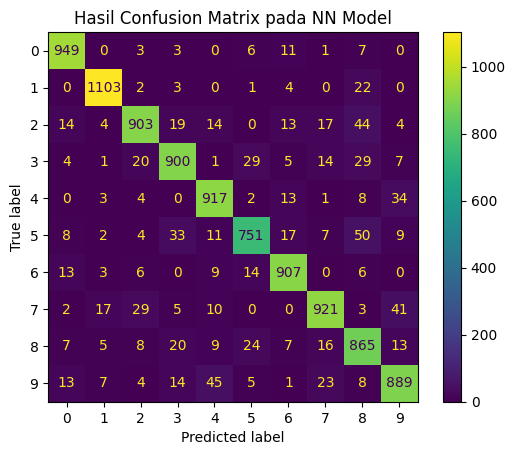

In [ ]:
# buat confusion matrix dan tampilkan visualisasinya
conMat = confusion_matrix(y_test, y_pred_decode,
                          labels = np.unique(y_test))
ConfusionMatrixDisplay(confusion_matrix = conMat,
                       display_labels = np.unique(y_test)).plot()
plt.title('Hasil Confusion Matrix pada NN Model')
plt.show()

In [ ]:
# lihat akurasi, f1 score, recall, dan precision pada model
acc = accuracy_score(y_test, y_pred_decode)
f1s = f1_score(y_test, y_pred_decode, average = 'macro')
rec = recall_score(y_test, y_pred_decode, average = 'macro')
prec = precision_score(y_test, y_pred_decode, average = 'macro')

print('Model NN di atas memiliki:')
print('1. Akurasi sebesar: ', f'{round(acc*100, 3)}%')
print('2. F1 Score sebesar: ', f'{round(f1s*100, 3)}%')
print('3. Recall sebesar: ', f'{round(rec*100, 3)}%')
print('4. Precision sebesar: ', f'{round(prec*100, 3)}%')

Model NN di atas memiliki:
1. Akurasi sebesar:  91.05%
2. F1 Score sebesar:  90.933%
3. Recall sebesar:  90.938%
4. Precision sebesar:  90.997%


## **Dengan PyTorch**

In [ ]:
# import paket-paket dari pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms

### Import MNIST Datasets

Serupa dengan Keras, di PyTorch juga sama-sama terdapat datasets MNIST yang terdapat label angka 0 sampai 9.

In [ ]:
# untuk mengubah gambar menjadi tensor
transTensor = transforms.ToTensor()

# import data dan lakukan splitting
pyto_train_data = datasets.MNIST(root='../Data',
                                 train = True,
                                 download = True,
                                 transform = transTensor)
pyto_test_data = datasets.MNIST(root='../Data',
                                train = False,
                                download = True,
                                transform = transTensor)

In [ ]:
# load datasets
torch.manual_seed(101)
pyto_train_loader = DataLoader(pyto_train_data, batch_size = 8192, shuffle = True)
pyto_test_loader = DataLoader(pyto_test_data, batch_size = 10000, shuffle = False)

### Visualisasi Data

Sebelum membuat model, mari Kita lihat sama-sama visualisasi data dari digit angka.

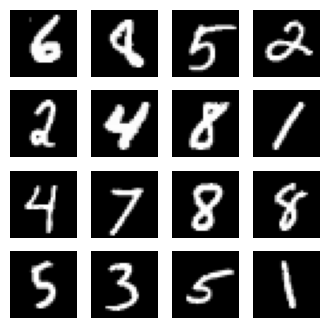

In [ ]:
# cek 16 data latih secara acak
pyto_sampleImages = []
pyto_sampleLabels = []
indexes = np.random.randint(0, len(pyto_train_data), size = 16)
for i in indexes:
  temp = pyto_train_data[i]
  pyto_sampleImages.append(temp[0])
  pyto_sampleLabels.append(temp[1])

# buat plot visualisasinya
plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = pyto_sampleImages[i]
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    plt.axis('off')

plt.show()

### Prapemrosesan Data

Sebelum membuat model, ada beberapa langkah yang perlu Kita lakukan, yakni prapemrosesan data!

In [ ]:
# simpan gambar dan labelnya
for pyto_images, pyto_labels in pyto_train_loader:
  break

In [ ]:
# lihat dimensi gambar mula-mula
print('Dimensi data latih mula-mula:', pyto_images.shape)

Dimensi data latih mula-mula: torch.Size([8192, 1, 28, 28])


In [ ]:
# ubah dan lihat dimensi gambar terkini
print('Dimensi data latih terkini:', pyto_images.view(len(pyto_images), -1).shape)

Dimensi data latih terkini: torch.Size([8192, 784])


### Desain Model

Sekarang mari Kita membuat desain model Deep Learning dengan PyTorch yang akan digunakan!

In [ ]:
# atur beberapa parameter
hidden_units = 256

In [ ]:
# definisikan model ke dalam class
class SimpleMLP(nn.Module):
  def __init__(self, inSize = 784, outSize = 10, laySize = hidden_units):
    super().__init__()

    self.fc1 = nn.Linear(inSize, laySize)
    self.fc3 = nn.Linear(laySize, outSize)

  def forward(self, X):
    X = torch.relu(self.fc1(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [ ]:
# lihat ringkasan model
torch.manual_seed(101)
pyto_model = SimpleMLP()
print(pyto_model, '\n=========================================================')

# cetak juga total parameternya
for param in pyto_model.parameters():
  print(param.numel())

SimpleMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
) 
200704
256
2560
10


### Pengaturan Hyperparameter

Selanjutnya, mari Kita lakukan pengaturan hyperparameter, seperti loss dan optimizer!

In [ ]:
# atur parameter loss dan optimizer yang digunakan
loss_criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(pyto_model.parameters())

### Latih Model

Setelah semua konfigurasi telah ditentukan, sekarang saatnya untuk melakukan pelatihan model! Let's go!

In [ ]:
# lakukan pelatihan model
num_epochs = 5
for epoch in range(num_epochs):
  correct_predictions = 0
  running_loss = 0.0

  for pyto_x_train, pyto_y_train in pyto_train_loader:
    optimizer.zero_grad()

    pyto_y_pred = pyto_model(pyto_x_train.view(len(pyto_x_train), -1))
    loss = loss_criterion(pyto_y_pred, pyto_y_train)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    _, predicted = torch.max(pyto_y_pred.data, 1)
    correct_predictions += (predicted == pyto_y_train).sum()

  accRate = correct_predictions.item()/len(pyto_train_data)
  lossRate = running_loss/len(pyto_train_loader)
  print(f'Epoch {epoch+1}, Loss: {lossRate}, Accuracy: {accRate}')

print('Finished Training')

Epoch 1, Loss: 1.9939913600683212, Accuracy: 0.5583833333333333
Epoch 2, Loss: 1.2661240175366402, Accuracy: 0.7866333333333333
Epoch 3, Loss: 0.7695954591035843, Accuracy: 0.8357833333333333
Epoch 4, Loss: 0.5401757024228573, Accuracy: 0.8634666666666667
Epoch 5, Loss: 0.43683531880378723, Accuracy: 0.8809833333333333
Finished Training


### Evaluasi Model

Selanjutnya mari sama-sama lakukan prediksi dan cek akurasi dari model yang terbentuk! Perlu diingat, sebelumnya Kita sudah melakukan import paket-paket untuk bahan evaluasi, serta telah membuat fungsi untuk decode hasil prediksi.

In [ ]:
# lakukan prediksi
with torch.no_grad():
  correct = 0

  for pyto_x_test, pyto_y_test in pyto_test_loader:
    y_val = pyto_model(pyto_x_test.view(len(pyto_x_test), -1))
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == pyto_y_test).sum()

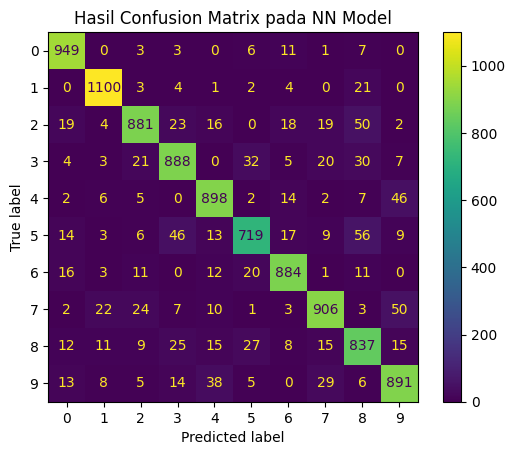

In [ ]:
# buat confusion matrix dan tampilkan visualisasinya
conMat = confusion_matrix(pyto_y_test.view(-1), predicted.view(-1),
                          labels = np.unique(pyto_y_test))
ConfusionMatrixDisplay(confusion_matrix = conMat,
                       display_labels = np.unique(pyto_y_test)).plot()
plt.title('Hasil Confusion Matrix pada NN Model')
plt.show()

In [ ]:
# lihat akurasi, f1 score, recall, dan precision pada model
acc = accuracy_score(pyto_y_test.view(-1), predicted.view(-1))
f1s = f1_score(pyto_y_test.view(-1), predicted.view(-1), average = 'macro')
rec = recall_score(pyto_y_test.view(-1), predicted.view(-1), average = 'macro')
prec = precision_score(pyto_y_test.view(-1), predicted.view(-1), average = 'macro')

print('Model NN di atas memiliki:')
print('1. Akurasi sebesar: ', f'{round(acc*100, 3)}%')
print('2. F1 Score sebesar: ', f'{round(f1s*100, 3)}%')
print('3. Recall sebesar: ', f'{round(rec*100, 3)}%')
print('4. Precision sebesar: ', f'{round(prec*100, 3)}%')

Model NN di atas memiliki:
1. Akurasi sebesar:  89.53%
2. F1 Score sebesar:  89.372%
3. Recall sebesar:  89.374%
4. Precision sebesar:  89.456%


## Kesimpulan

Dari percobaan di atas dapat Kita peroleh bahwa performa model baik dari Keras ataupun PyTorch menunjukkan **hasil yang baik**! Hal itu dibuktikan dengan semua metrics seperti Akurasi, F1 Score, Recall, dan Precision yang memperoleh <u>tingkat ketepatan di atas **89%**</u>.

Meskipun begitu, terdapat pengaturan yang bisa Kita tuning guna meningkatkan tingkat ketepatan pada metrics seperti:
1. Menambah metode <i>Dropout</i>,
2. Menambah jumlah epochs pada pelatihan model.

**<i>Eksperimen saran tuning di atas akan dijelaskan pada tugas 04_Bonus!</i>**